In [2]:
import json
import pymongo
import certifi
import pandas

# Retrieve credentials for MongoDB server from my credentials file
with open('F:/secrets.json') as f:
   data = json.load(f)
   secret_key = data['mongodb']

# Fetch the database named "DA-320"

client = pymongo.MongoClient (secret_key, tlsCAFile=certifi.where())
da320_database = client['IMDB_METACRITIC']
metacritic_data = da320_database['metacritic']
metacritic = pandas.DataFrame(metacritic_data.find())

metacritic.head()

,_id,movie_id,title,release_date,description,score,thumbnail
0,634e3688a6ff648705ba41e1,11234,"Crouching Tiger, Hidden Dragon","December 8, 2000","In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...
1,634e3688a6ff648705ba41e6,11239,The Wind Will Carry Us,"July 28, 2000","With a strange mission, a group of people from...",86,https://static.metacritic.com/images/products/...
2,634e3688a6ff648705ba41e2,11235,Yi Yi,"October 6, 2000",This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...
3,634e3688a6ff648705ba41e8,11241,Before Night Falls,"December 22, 2000",A richly imagined joumey into the life and wri...,85,https://static.metacritic.com/images/products/...
4,634e3688a6ff648705ba41e9,11242,You Can Count on Me,"November 10, 2000",A young mother (Laura Linney) is cheating on h...,85,https://static.metacritic.com/images/products/...


In [4]:
# Convert release dates into actual dates and gather year/month
metacritic.release_date = pandas.to_datetime (metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.metascore = pandas.to_numeric(metacritic.score)
metacritic.head()

C:\Users\KK Campus\AppData\Local\Temp\ipykernel_21048\1439660442.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  metacritic.metascore = pandas.to_numeric(metacritic.score)


,_id,movie_id,title,release_date,description,score,thumbnail,year,month
0,634e3688a6ff648705ba41e1,11234,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,634e3688a6ff648705ba41e6,11239,The Wind Will Carry Us,2000-07-28,"With a strange mission, a group of people from...",86,https://static.metacritic.com/images/products/...,2000,7
2,634e3688a6ff648705ba41e2,11235,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
3,634e3688a6ff648705ba41e8,11241,Before Night Falls,2000-12-22,A richly imagined joumey into the life and wri...,85,https://static.metacritic.com/images/products/...,2000,12
4,634e3688a6ff648705ba41e9,11242,You Can Count on Me,2000-11-10,A young mother (Laura Linney) is cheating on h...,85,https://static.metacritic.com/images/products/...,2000,11


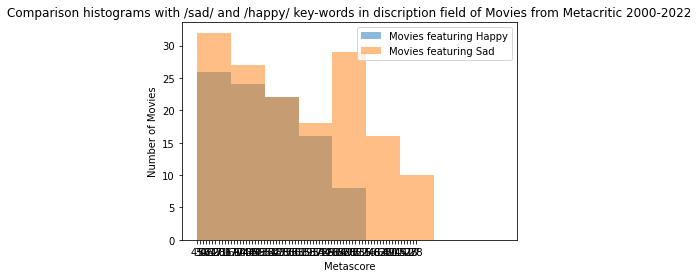

In [6]:
from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter
import numpy

# Retrieve metascore for happy and sad in description
scores_happy = metacritic[metacritic['description'].str.contains("happy")].score
scores_sad = metacritic[metacritic['description'].str.contains("sad")].score

# Plot into buckets
bins = numpy.linspace(0, 100, 10)
pyplot.title("Comparison histograms with /sad/ and /happy/ key-words in discription field of Movies from Metacritic 2000-2022")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.hist (scores_happy, bins, alpha=0.5, label='Movies featuring Happy')
pyplot.hist (scores_sad, bins, alpha=0.5, label='Movies featuring Sad')

pyplot.legend (loc='upper right')
pyplot.show()

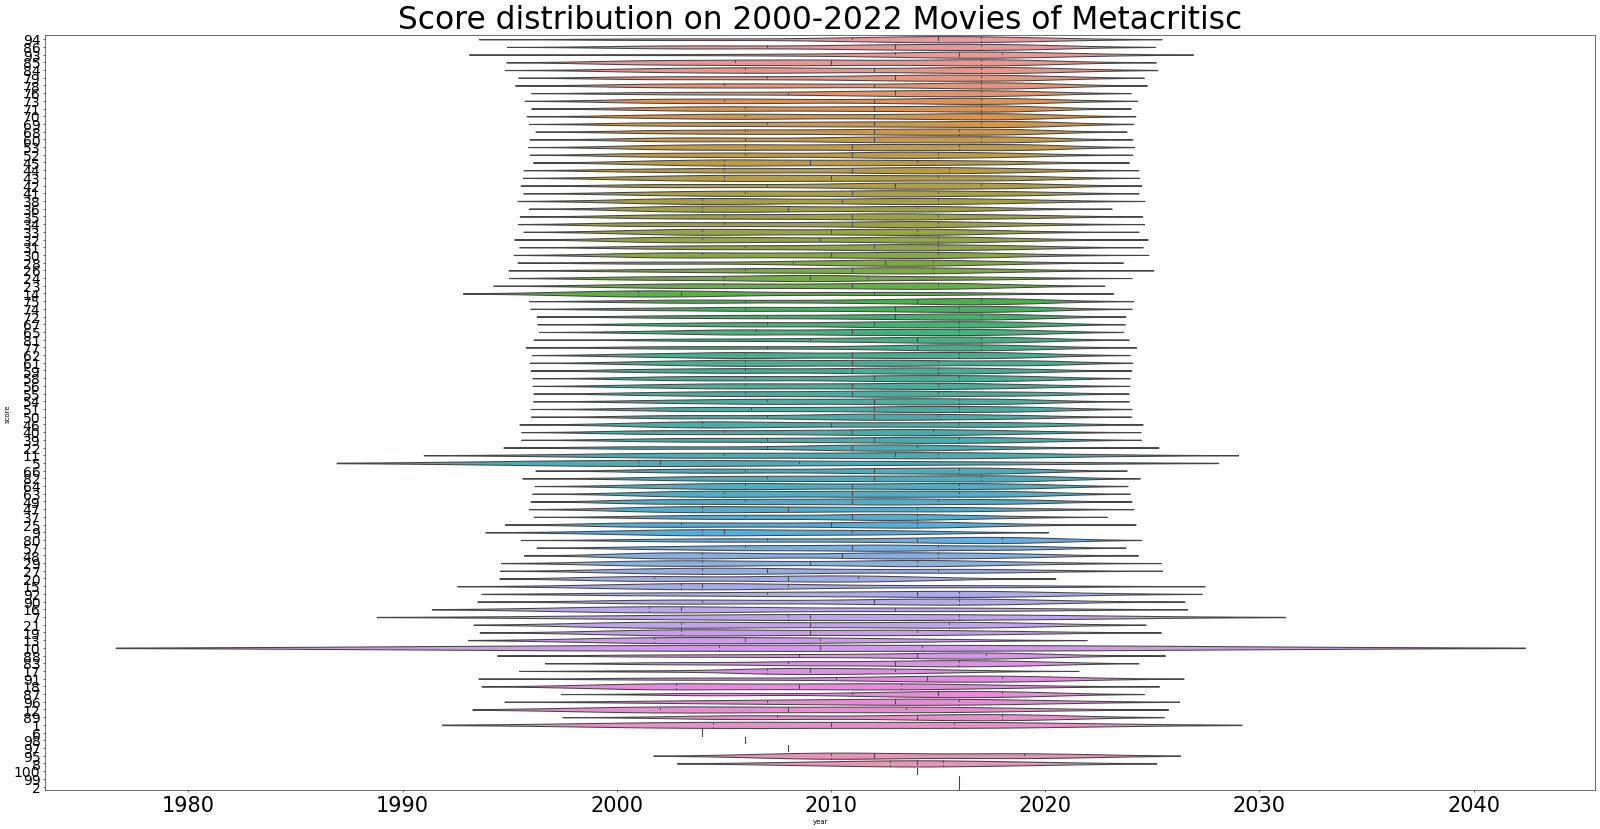

In [8]:
# violinplot for user rating distribution vs runtime of all films realeased in 2012
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,20), dpi=50)
sns.violinplot(x='year', y='score',  data=metacritic, scale='width', inner='quartile', lablesize = 30)
# Decoration
#plt.gca().yaxis.set_major_formatter(format_currency)
plt.title('Score distribution on 2000-2022 Movies of Metacritisc', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.show()
#still looking for label frontsize

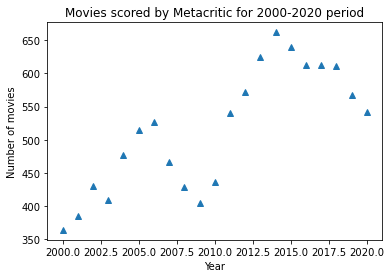

In [10]:
from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter

# Set up labels on the axes
pyplot.title('Movies scored by Metacritic for 2000-2020 period')
pyplot.xlabel('Year')
pyplot.ylabel('Number of movies')

# Count movies measured by metacritic by year and plot the results
df = metacritic['year'].groupby(metacritic.year).agg ('count')
pyplot.plot(df,'^')
pyplot.show()

Findings: Why is thereso small amount of movies on Metacritic in 2007 and 2009? - I checked Metacritic web-page - there are 467 movies for 2007 and 404 movies for 2009 with very wide spread of metacritic score, similar to other years.